In [ ]:
!git clone https://github.com/XingangPan/DragGAN.git
%cd /content/DragGAN
!pip install -r requirements.txt
!sh scripts/gui.sh
!python scripts/download_model.py
!python /content/DragGAN/visualizer_drag_gradio.py

Cloning into 'DragGAN'...
remote: Enumerating objects: 416, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 416 (delta 110), reused 78 (delta 74), pack-reused 238
Receiving objects: 100% (416/416), 34.08 MiB | 28.80 MiB/s, done.
Resolving deltas: 100% (165/165), done.


# **I recommend you to Start this pipelines code form here to Build text to 3D Model**

In [25]:
%cd /content

/content


In [1]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate
!pip install rembg
!pip install pillow==7.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... don

In [3]:
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 29 files:   0%|          | 0/29 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [4]:
def dummy(images, **kwargs): return images, False
pipe.safety_checker = dummy

In [5]:
pipe = pipe.to("cuda")

In [6]:
prompt = "dystopian style Shadow Play, Fujifilm X100 . bleak, post-apocalyptic, somber, dramatic, highly detailed, detailed face, masterpiece picture of a young woman, Petite, toned, body, Modest Proportions breast, Crop top, Ripped skinny jeans, studded leather jacket, band t-shirt, combat boots, spiked choker, capturing the spirit of exploration, Derelict Office Lobby, Extreme wide-angle"
negative_prompt = "ugly, deformed, noisy, blurry, low contrast, cheerful, optimistic, vibrant, colorful, blurry eyes, two heads, two faces, plastic, Deformed, blurry, bad anatomy, bad eyes, crossed eyes, poorly drawn face, mutation, mutated, extra limb, ugly, poorly drawn hands, missing limb, blurry, floating limbs, disconnected limbs, malformed hands, blur, out of focus, long neck, long body, mutated hands and fingers, out of frame, blender, doll, cropped, low-res, close-up, poorly-drawn face, out of frame double, blurred, ugly, disfigured, too many fingers, deformed, repetitive, grainy, extra limbs, bad anatomy, airbrush, zoomed, deformed, extra limbs, extra fingers, mutated hands, bad anatomy, bad proportions, blind, bad eyes, ugly eyes, dead eyes, vignette, out of shot, out of focus, gaussian, closeup, monochrome, grainy, noisy, text, writing, watermark, logo, over saturation, over shadow, negatveXL, unaestheticXLv1"

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['office lobby, extreme wide - angle']


  0%|          | 0/25 [00:00<?, ?it/s]

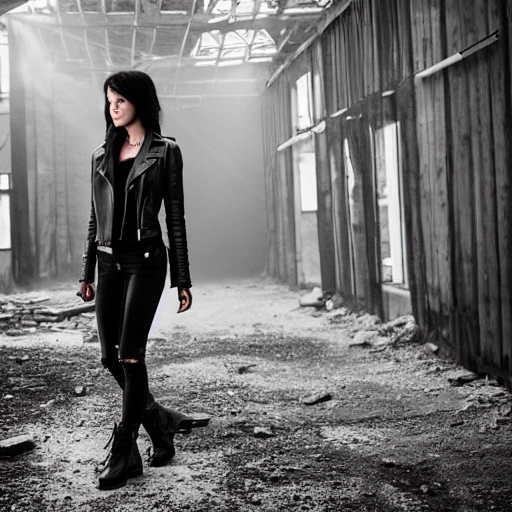

In [11]:
import torch
generator = torch.Generator("cuda").manual_seed(8112277)
image = pipe(prompt, negative_prompt=negative_prompt, num_inference_steps=25, generator=generator).images[0]
image.save(f"image1.png")
image

In [12]:
from rembg import remove
from PIL import Image
input_path = r'/content/image1.png'
output_path = r'/content/image.png'
input = Image.open(input_path)
output = remove(input)
output.save(output_path)

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 131GB/s]


In [1]:
!git clone https://github.com/facebookresearch/pifuhd
!git clone https://github.com/openai/shap-e.git
!git clone https://github.com/Daniil-Osokin/lightweight-human-pose-estimation.pytorch.git

Cloning into 'pifuhd'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 222 (delta 92), reused 82 (delta 82), pack-reused 96
Receiving objects: 100% (222/222), 399.39 KiB | 10.51 MiB/s, done.
Resolving deltas: 100% (114/114), done.
Cloning into 'shap-e'...
remote: Enumerating objects: 330, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 330 (delta 37), reused 218 (delta 20), pack-reused 76
Receiving objects: 100% (330/330), 11.72 MiB | 20.69 MiB/s, done.
Resolving deltas: 100% (40/40), done.
Cloning into 'lightweight-human-pose-estimation.pytorch'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 120 (delta 19), reused 18 (delta 18), pack-reused 90
Receiving objects: 100% (120/120), 226.70 KiB | 6.30 MiB/s, done.


In [2]:
import os
image_path = '/content/image.png'
image_dir = os.path.dirname(image_path)
file_name = os.path.splitext(os.path.basename(image_path))[0]
obj_path = '/content/pifuhd/results/pifuhd_final/recon/result_%s_256.obj' % file_name
out_img_path = '/content/pifuhd/results/pifuhd_final/recon/result_%s_256.png' % file_name
video_path = '/content/pifuhd/results/pifuhd_final/recon/result_%s_256.mp4' % file_name
video_display_path = '/content/pifuhd/results/pifuhd_final/result_%s_256_display.mp4' % file_name

In [4]:
%cd /content/lightweight-human-pose-estimation.pytorch/
!wget https://download.01.org/opencv/openvino_training_extensions/models/human_pose_estimation/checkpoint_iter_370000.pth

/content/lightweight-human-pose-estimation.pytorch
--2023-09-21 06:54:08--  https://download.01.org/opencv/openvino_training_extensions/models/human_pose_estimation/checkpoint_iter_370000.pth
Resolving download.01.org (download.01.org)... 104.90.250.224, 2600:1409:9800:882::4b21, 2600:1409:9800:884::4b21
Connecting to download.01.org (download.01.org)|104.90.250.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87959810 (84M) [application/octet-stream]
Saving to: ‘checkpoint_iter_370000.pth’

checkpoint_iter_370 100%[===================>]  83.88M  98.0MB/s    in 0.9s    

2023-09-21 06:54:09 (98.0 MB/s) - ‘checkpoint_iter_370000.pth’ saved [87959810/87959810]



In [5]:
import torch
import cv2
import numpy as np
from models.with_mobilenet import PoseEstimationWithMobileNet
from modules.keypoints import extract_keypoints, group_keypoints
from modules.load_state import load_state
from modules.pose import Pose, track_poses
import demo

def get_rect(net, images, height_size):
    net = net.eval()

    stride = 8
    upsample_ratio = 4
    num_keypoints = Pose.num_kpts
    previous_poses = []
    delay = 33
    for image in images:
        rect_path = image.replace('.%s' % (image.split('.')[-1]), '_rect.txt')
        img = cv2.imread(image, cv2.IMREAD_COLOR)
        orig_img = img.copy()
        orig_img = img.copy()
        heatmaps, pafs, scale, pad = demo.infer_fast(net, img, height_size, stride, upsample_ratio, cpu=False)

        total_keypoints_num = 0
        all_keypoints_by_type = []
        for kpt_idx in range(num_keypoints):  # 19th for bg
            total_keypoints_num += extract_keypoints(heatmaps[:, :, kpt_idx], all_keypoints_by_type, total_keypoints_num)

        pose_entries, all_keypoints = group_keypoints(all_keypoints_by_type, pafs)
        for kpt_id in range(all_keypoints.shape[0]):
            all_keypoints[kpt_id, 0] = (all_keypoints[kpt_id, 0] * stride / upsample_ratio - pad[1]) / scale
            all_keypoints[kpt_id, 1] = (all_keypoints[kpt_id, 1] * stride / upsample_ratio - pad[0]) / scale
        current_poses = []

        rects = []
        for n in range(len(pose_entries)):
            if len(pose_entries[n]) == 0:
                continue
            pose_keypoints = np.ones((num_keypoints, 2), dtype=np.int32) * -1
            valid_keypoints = []
            for kpt_id in range(num_keypoints):
                if pose_entries[n][kpt_id] != -1.0:  # keypoint was found
                    pose_keypoints[kpt_id, 0] = int(all_keypoints[int(pose_entries[n][kpt_id]), 0])
                    pose_keypoints[kpt_id, 1] = int(all_keypoints[int(pose_entries[n][kpt_id]), 1])
                    valid_keypoints.append([pose_keypoints[kpt_id, 0], pose_keypoints[kpt_id, 1]])
            valid_keypoints = np.array(valid_keypoints)

            if pose_entries[n][10] != -1.0 or pose_entries[n][13] != -1.0:
              pmin = valid_keypoints.min(0)
              pmax = valid_keypoints.max(0)

              center = (0.5 * (pmax[:2] + pmin[:2])).astype(np.int)
              radius = int(0.65 * max(pmax[0]-pmin[0], pmax[1]-pmin[1]))
            elif pose_entries[n][10] == -1.0 and pose_entries[n][13] == -1.0 and pose_entries[n][8] != -1.0 and pose_entries[n][11] != -1.0:
              # if leg is missing, use pelvis to get cropping
              center = (0.5 * (pose_keypoints[8] + pose_keypoints[11])).astype(np.int)
              radius = int(1.45*np.sqrt(((center[None,:] - valid_keypoints)**2).sum(1)).max(0))
              center[1] += int(0.05*radius)
            else:
              center = np.array([img.shape[1]//2,img.shape[0]//2])
              radius = max(img.shape[1]//2,img.shape[0]//2)

            x1 = center[0] - radius
            y1 = center[1] - radius

            rects.append([x1, y1, 2*radius, 2*radius])

        np.savetxt(rect_path, np.array(rects), fmt='%d')

In [6]:
net = PoseEstimationWithMobileNet()
checkpoint = torch.load('checkpoint_iter_370000.pth', map_location='cpu')
load_state(net, checkpoint)

get_rect(net.cuda(), [image_path], 512)

<ipython-input-5-4884b947f585>:57: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  center = (0.5 * (pose_keypoints[8] + pose_keypoints[11])).astype(np.int)


In [7]:
%cd /content/pifuhd/
!sh ./scripts/download_trained_model.sh

/content/pifuhd
+ mkdir -p checkpoints
+ cd checkpoints
+ wget https://dl.fbaipublicfiles.com/pifuhd/checkpoints/pifuhd.pt pifuhd.pt
--2023-09-21 06:54:48--  https://dl.fbaipublicfiles.com/pifuhd/checkpoints/pifuhd.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.180.70, 3.163.180.121, 3.163.180.9, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.180.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1548375177 (1.4G) [application/octet-stream]
Saving to: ‘pifuhd.pt’

pifuhd.pt           100%[===================>]   1.44G   238MB/s    in 5.9s    

2023-09-21 06:54:54 (252 MB/s) - ‘pifuhd.pt’ saved [1548375177/1548375177]

--2023-09-21 06:54:54--  http://pifuhd.pt/
Resolving pifuhd.pt (pifuhd.pt)... failed: Name or service not known.
wget: unable to resolve host address ‘pifuhd.pt’
FINISHED --2023-09-21 06:54:54--
Total wall clock time: 6.1s
Downloaded: 1 files, 1.4G in 5.9s (252 MB/s)


In [8]:

!python -m apps.simple_test -r 256 --use_rect -i $image_dir


Resuming from  ./checkpoints/pifuhd.pt
test data size:  1
initialize network with normal
initialize network with normal
generate mesh (test) ...
  0% 0/1 [00:00<?, ?it/s]./results/pifuhd_final/recon/result_image_256.obj
100% 1/1 [00:05<00:00,  5.83s/it]


In [9]:
import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=c3ada5de0e8a6b544376838745e9dea1aa33103fd52c8be4218958aab4514e13
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31530 sha256=ec161d7fc59e96d4bbc73e1c941b9e1294b6020a5d409645bda01638db8b83a2
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu118_pyt201/download.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 186.7 MB/s eta 0:00:00


In [10]:
from lib.colab_util import generate_video_from_obj, set_renderer, video

renderer = set_renderer()
generate_video_from_obj(obj_path, out_img_path, video_path, renderer)

!ffmpeg -i $video_path -vcodec libx264 $video_display_path -y -loglevel quiet
video(video_display_path)

/usr/local/lib/python3.10/dist-packages/pytorch3d/io/obj_io.py:544: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


  0%|          | 0/90 [00:00<?, ?it/s]

In [11]:
%cd /content/shap-e
!pip install -e .

/content/shap-e
Obtaining file:///content/shap-e
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-0wrjs0im/clip_61bdfd5dec6d44a69aae2dff57ce79b2
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-0wrjs0im/clip_61bdfd5dec6d44a69aae2dff57ce79b2
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.3 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=46421d909b46adba27ace91b635262782b30958e6faaa6df1f866efb7cfa0975


In [16]:
import torch

from shap_e.diffusion.sample import sample_latents
from shap_e.diffusion.gaussian_diffusion import diffusion_from_config
from shap_e.models.download import load_model, load_config
from shap_e.util.notebooks import create_pan_cameras, decode_latent_images, gif_widget
from shap_e.util.image_util import load_image

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# **Option 1 From Image to 3D**

In [26]:
xm = load_model('transmitter', device=device)
model = load_model('image300M', device=device)
diffusion = diffusion_from_config(load_config('diffusion'))


In [27]:
batch_size = 4
guidance_scale = 3.0

# To get the best result, you should remove the background and show only the object of interest to the model.
image = load_image("/content/image.png")

latents = sample_latents(
    batch_size=batch_size,
    model=model,
    diffusion=diffusion,
    guidance_scale=guidance_scale,
    model_kwargs=dict(images=[image] * batch_size),
    progress=True,
    clip_denoised=True,
    use_fp16=True,
    use_karras=True,
    karras_steps=64,
    sigma_min=1e-3,
    sigma_max=160,
    s_churn=0,
)

  0%|          | 0/64 [00:00<?, ?it/s]

In [28]:
render_mode = 'nerf' # you can change this to 'stf' for mesh rendering
size = 64 # this is the size of the renders; higher values take longer to render.

cameras = create_pan_cameras(size, device)
for i, latent in enumerate(latents):
    images = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
    display(gif_widget(images))

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIcAANenjr6Ug8KQf6uOhsOCdq+CeZ6CfoqGjahvY5B6erRmXZ5mX3…

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIcAAMCdiLWMf7iGfLKAe6WFf6WAeqJ+eJSGgNd3bcd5ba54dZd7dp…

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIcAAMykkryYhdKSfriVisSKeK6IgJ2Gebh8caJ9cZt+eZF9c4J6er…

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIcAANSihM+WdsWQdMqHcaGEd6RyZnlxbG1tbWZrcpppYXFpaGVpcm…

# **Option 2 from text to 3D**

In [32]:
xm = load_model('transmitter', device=device)
model = load_model('text300M', device=device)
diffusion = diffusion_from_config(load_config('diffusion'))


In [33]:
batch_size = 4
guidance_scale = 15.0
prompt = "Apple"

latents = sample_latents(
    batch_size=batch_size,
    model=model,
    diffusion=diffusion,
    guidance_scale=guidance_scale,
    model_kwargs=dict(texts=[prompt] * batch_size),
    progress=True,
    clip_denoised=True,
    use_fp16=True,
    use_karras=True,
    karras_steps=64,
    sigma_min=1e-3,
    sigma_max=160,
    s_churn=0,
)

  0%|          | 0/64 [00:00<?, ?it/s]

# **Continue after Selecting any Option**

In [34]:
render_mode = 'nerf' # you can change this to 'stf' for mesh rendering
size = 64 # this is the size of the renders; higher values take longer to render.

cameras = create_pan_cameras(size, device)
for i, latent in enumerate(latents):
    images = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
    display(gif_widget(images))

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIcAAMitW8WsXsOtYsepV8imUsKnW8CsZb+pYb6mXrmmY8miSsWcR7…

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIcAAOSKRc6IC9CCGsiGE8eCG9h7NMx7IMl9Isd4E9dzN81zHcd1Kt…

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIcAAN1tQtZoQNhlPNdhOtFmP8xiPs9fO8dfOb1gLtBaN9NUMcVaN8…

HTML(value='<img src="data:image/gif;base64,R0lGODlhQABAAIcAANmMKdKCLdR/L8h/K9N7LMp7L8R4Ks9zLMdzLL92K8ByKLp0Lb…

In [35]:
from shap_e.util.notebooks import decode_latent_mesh

for i, latent in enumerate(latents):
    t = decode_latent_mesh(xm, latent).tri_mesh()
    with open(f'model_mesh_{i}.ply', 'wb') as f:
        t.write_ply(f)
    with open(f'model_mesh_{i}.obj', 'w') as f:
        t.write_obj(f)
    with open(f'model_mesh_{i}.fbx', 'w') as f:
        t.write_obj(f)